In [5]:

# https://www.openml.org/search?type=data&sort=runs&id=216&satatus=active 
from datasets import load_dataset
elevators = load_dataset('inria-soda/tabular-benchmark', data_files='reg_num/elevators.csv')

In [8]:
elev = elevators['train'].to_pandas()

In [9]:
from sklearn.tree import DecisionTreeRegressor
X_elev = elev.drop(columns=['Goal'])
y_elev = elev['Goal']
dt_elev = DecisionTreeRegressor(max_depth=3)
dt_elev.fit(X_elev, y_elev)

DecisionTreeRegressor(max_depth=3)

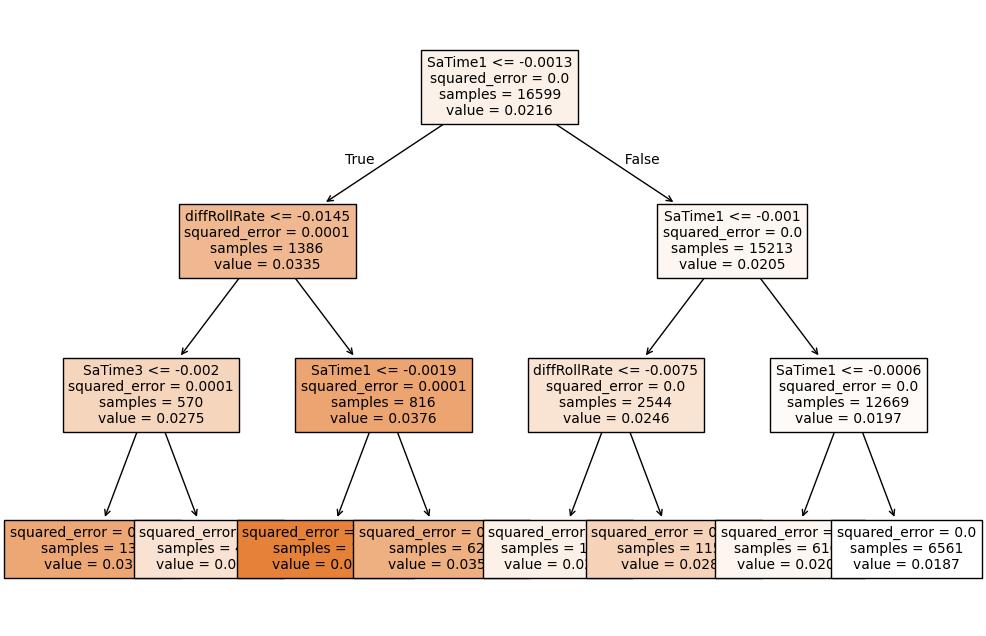

In [10]:
import matplotlib.pyplot as plt
# plot the tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 8))
_ = plot_tree(dt_elev, ax=ax, feature_names=X_elev.columns, filled=True, fontsize=10, precision=4)

In [11]:
dt_elev.score(X_elev, y_elev)

0.48738100110114524

In [12]:
from sklearn.linear_model import LinearRegression
lr_elev = LinearRegression()
lr_elev.fit(X_elev, y_elev)
lr_elev.score(X_elev, y_elev)

0.8134729462382582

<Axes: >

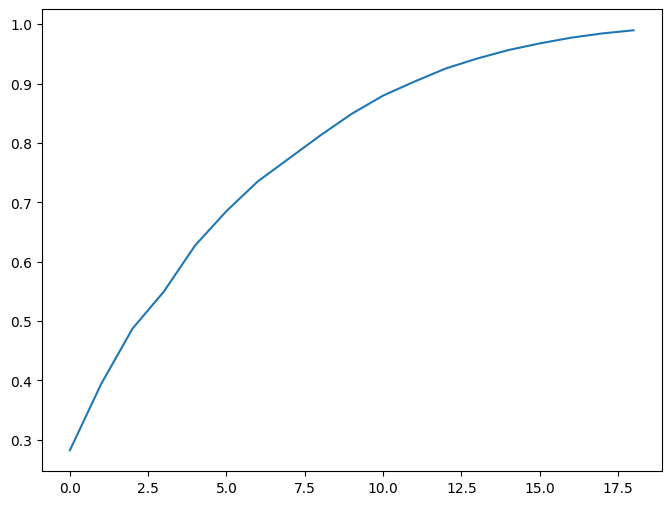

In [14]:
import pandas as pd

# loop over depths and plot the results
scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_elev, y_elev)
    scores.append(dt.score(X_elev, y_elev))

pd.Series(scores).plot.line(figsize=(8, 6))

Text(0.5, 1.0, 'Validation Curve for Decision Tree')

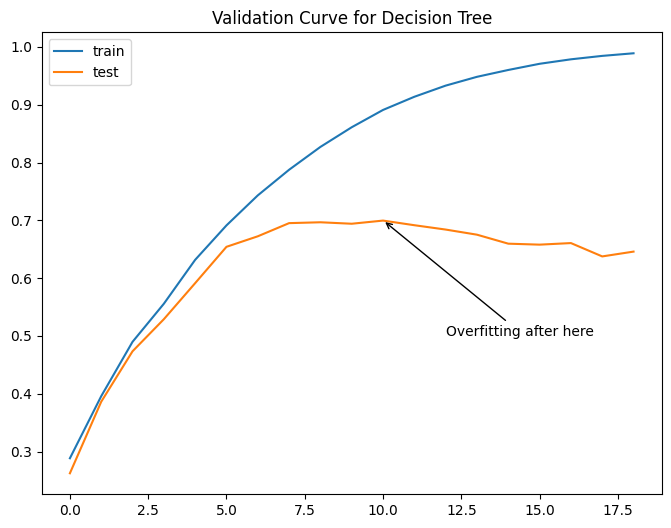

In [15]:
# split the data and plot results of train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_elev, y_elev, random_state=42)
test_scores = []
train_scores = []
for i in range(1, 20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train, y_train)
    test_scores.append(dt.score(X_test, y_test))
    train_scores.append(dt.score(X_train, y_train))

ax = pd.DataFrame({'train': train_scores, 'test': test_scores}).plot.line(figsize=(8, 6))

# annotate overfitting at 10, .7
ax.annotate('Overfitting after here', xy=(10, .7), xytext=(12, .5), arrowprops={'arrowstyle': '->'})

# set title
ax.set_title('Validation Curve for Decision Tree')

In [16]:
# Let's see if our model improves with a deeper tree
dt_elev = DecisionTreeRegressor(max_depth=11)
dt_elev.fit(X_train, y_train)
dt_elev.score(X_test, y_test)

0.7038166916992509

In [17]:
lr_elev = LinearRegression()
lr_elev.fit(X_train, y_train)
lr_elev.score(X_test, y_test)

0.8174575653756877